# Chapter 3: Classification

In [0]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import sklearn


MNIST is a very famous data set
*   70,000 compiled images of handwritten digits from different sets of people
*   Analog of "hello world" to ML
Scikit Learn has built-in MNIST functions
*   fetch_openML('mnist_784',version=1) opens the database containing 784 features (pixels).

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version = 1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

Some important keys:
*   'DESCR': a description of the dataset (author info, license, etc.)
*   'data': the unlabelled data 1 row per instance, 1 column per feature
*   'target': the labels associated with 'data' 

In [3]:
mnist.DESCR
#mnist.data.shape
#mnist.target.shape

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

The keys are used to access the MNIST data 

5

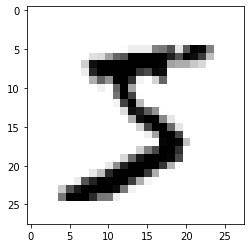

In [4]:
X,y = mnist['data'], mnist['target']
i = 0
y = y.astype(np.uint8)
somedigit = X[i]
somedigit_image = somedigit.reshape(28,28)
plt.imshow(somedigit_image, cmap="binary")
#remember to cast the label to a numeric value instead of a string
y[i]

MNIST is already split into testing and training data and shuffled to avoid errors associated with the order of training instances
1st 60,000 is training 
last 10,000 is testing

In [0]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

**Binary Classifiers**

Can we predict if an image is a 5 or not?

We can use the SGD classifier to train a model sgd_class to recognize only the 5's. Then, using the data set and the model we can predict if the unlabelled data is a 5 or not.

In [6]:
y_train_5 = (y_train==5)
y_test_5 = (y_test==5)

from sklearn.linear_model import SGDClassifier
#import the stochastic classifer. the random_state parameter allows for reproducability (?)
sgd_class = SGDClassifier(random_state =42)
sgd_class.fit(X_train, y_train_5)

sgd_class.predict([somedigit])

array([ True])

Now we can implement cross-validation on our "5-detector"

We can use the cross_val_score function in the basic sklearn library to work with 3 folds (or more?)

In [7]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_class, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

Another way to test the ability of a model is to use a "confusion matrix". Accuracy doesn't always describe how well a model performs, especially when the dataset is highly skewed and an unintelligent option could do somewhat well.

It shows the amount of times feature x was mistaken as feature y when predicting based on a given model. 



1.   Use cross_val_predict to perform k-folds and predict on the unseen set for each fold
2.   Compare the prediction with the training to show uncover the confusion



In [0]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_pred_5 = cross_val_predict(sgd_class, X_train, y_train_5, cv = 3)
confusion_m = confusion_matrix(y_train_5, y_train_pred_5)

Row 1: non-5 images
> [0,0] shows the number that were correctly identified as non-5

> [0,1] false positives - # that were incorrectly identified as 5's

Row 2: 5's (positive class)
> [1,0] false negatives - # that were incorrectly identified as non-5's

> [1,1] shows the number that were correctly identified as 5's

TP: True positive [1,1]
FP: False positive [0,1]
FN: False negative [1,0]

Precision = TP/(TP + FP)

Recall = TP/(TP + FN)

f1 score is the "harmonic mean" and is used as a classifier score that accounts for both precision and recall and **favors a balance**. Unfortunately, there is a tradeoff between the two and maximizing one reduces the other.

In [50]:
TP = confusion_m[1,1]
FP = confusion_m[0,1]
FN = confusion_m[1,0]

precision = TP/(TP + FP)
recall = TP/(TP + FN)

print(precision, recall)

from sklearn.metrics import precision_score, recall_score, f1_score
precision_sk = precision_score(y_train_5,y_train_pred_5)
recall_sk = recall_score(y_train_5,y_train_pred_5)
f1_sk = f1_score(y_train_5,y_train_pred_5)

print(precision_sk, recall_sk, f1_sk)

0.8370879772350012 0.6511713705958311
0.8370879772350012 0.6511713705958311 0.7325171197343846


**The Precision-Recall Trade-off**

The SGDClassifier uses a decision function to assign a feature to the positive or negative class, based on a threshold. 

While we can't change the threshold directly with SKLearn, the decision function can be called directly which will output the decision score (this can be compared to the threshold manually)

Increasing the threshold gives more false positives, increasing recall but decreasing precision. 

Decreasing the threshold gives more false negatives, increasing precision (in general) but decreasing recall. 

**ROC Curve**
ROC - receiver operating characteristic. 
*   plots the true positive rate against the false positive rate
*   Commonly used with binary classifiers
*   Dotted line represents a random classifier, so distance away from ROC-curve is a positive indicator of classifier performance

NameError: ignored

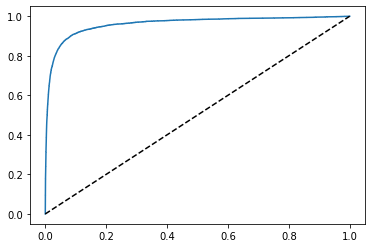

In [9]:
from sklearn.metrics import roc_curve
y_scores = cross_val_predict(sgd_class, X_train, y_train_5, cv=3, method = "decision_function")
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'k--') # unity line ROC-curve
mpl.axes.Axes.set_ylabel(self,'True Positive Rate (recall)')
mpl.axes.Axes.set_xlabel(self,'False Positive Rate')

Use the Precision-Recall curve when the positive class is rare among the dataset (you care about false positives more). Otherwise, use the ROC=curve


**Multi-class Classification**

SGD classifiers, Random Forest, naieve Bayes Classifiers can handle multiple classes 

Logistic regression and Support Vector Machines (SVMs) are binary

To use binary classification algorithms for multiple classes there are 2 strats:

1. One-vs-Rest (OvR) Train 1 classifiers to recognize each of n classes from the rest of the set. For each instance, choose the class with the highest score
2. One-vs-One (OvO) Train a binary classifier for each pair of classes then run the dataset on all classifiers and see which class "wins" the most "duels"

OvR is preferred in most cases but OvO can be used with large datasets to reduce the amount of training time required. 

In [10]:
from sklearn.svm import SVC
svm_class = SVC()
svm_class.fit(X_train, y_train) # now we use the whole number set, not just the 5s
svm_class.predict([somedigit])  #what the algorithm thinks it is 
svm_class.decision_function([somedigit]) #the scores of other things it could be

array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

We can also force the method that SVC() uses!

In [0]:
from sklearn.multiclass import OneVsRestClassifier
OvR_class = OneVsRestClassifier(SVC())
OvR_class.fit(X_train, y_train)

**Error Analysis**

To find the error in the prediction, cross-validate and compute the confusion matrix. The confusion matrix can be plotted in 2D. Also, we can scale the values before doing this to increase accuracy even further! 

In [0]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train_s = scale.fit_transform(X_train.astype(np.float64))

y_train_predict = cross_val_predict(svm_class,X_train_s,y_train,cv=3)
conf_mx = confusion_matrix(y_train,y_train_predict)

plot.matshow(conf_mx, cmap = plt.cm.gray)

Highlighting the main diagonal shows that the model does pretty well at showing the real values. 

**Row**: real values 

**Col**: predicted value

The confusion matrix shows the absolute error rate, so we can adjust this by the number of occurences of each class to normalize. Also, now that we know the main diagonal is good, we can zero those values so that the colors stand our more. 

In [0]:
row_sum = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx/row_sum
np.fll_diagonal(norm_conf_mx,0)
plot.matshow(norm_conf_mx, cmap = plt.cm.gray)

**Multilabel Classification**
In the case where a single instance could contain multiple classes (google photos) we need to output multiple binary tags. 

For example, what if we trained a model to recognize 7's and odd numbers (classes overlap).

In [0]:
from sklearn.neighbors import KNeighborsClassifier
y_train7 = (y_train==7)
y_trainodd = (y%2 == 1)

y_multilabel = np.c_[y_train7, y_trainodd]
knn_class = KNeighborsClassifier()
knn_class.fit(X_train,y_multilabel)
knn_class.predict([somedigit])  #how does the model work with our classic somedigit=5
